In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
from typing import List

In [2]:
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

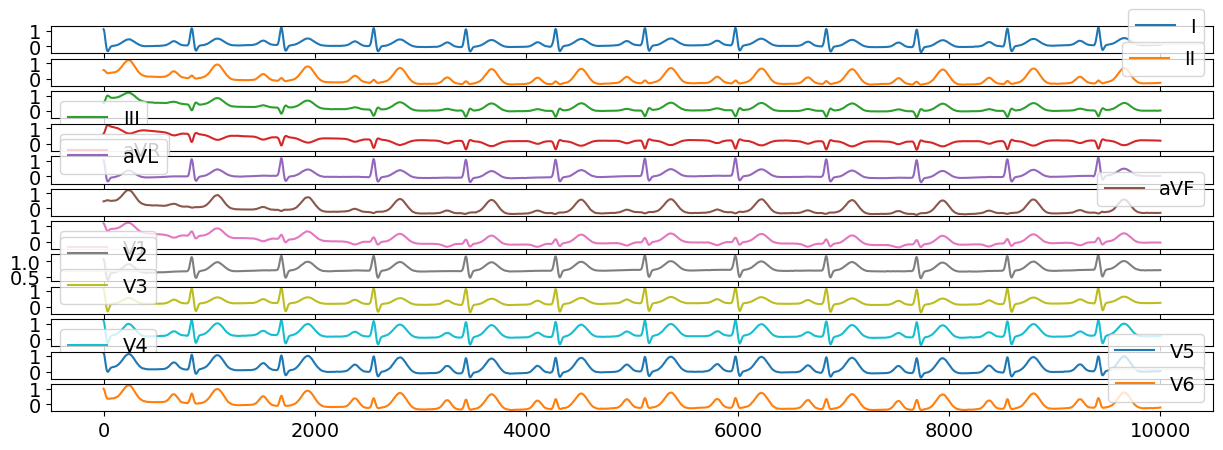

In [3]:
ecg12 = nk.ecg_simulate(duration=10, method="multileads")

# Visualize results
pd.DataFrame(ecg12[0:10000]).plot(subplots=True);

In [6]:
ecg12

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,1.087357,0.565872,0.518427,0.642922,1.037608,0.466155,1.154756,1.073378,1.119579,1.166999,1.202421,0.989700
1,1.081683,0.564962,0.519747,0.644225,1.032077,0.465813,1.151580,1.070546,1.113110,1.160689,1.197414,0.987110
2,1.070272,0.563675,0.523056,0.648313,1.020695,0.465857,1.146268,1.065253,1.101137,1.149107,1.187650,0.981647
3,1.053046,0.561907,0.528412,0.655174,1.003417,0.466288,1.138927,1.057456,1.083631,1.132201,1.173031,0.973250
4,1.030122,0.559585,0.535804,0.664701,0.980394,0.467093,1.129702,1.047185,1.060726,1.110077,1.153620,0.961970
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.091301,-0.269369,0.035819,0.192813,0.023741,-0.285436,-0.020071,0.723032,0.234057,0.200163,0.030758,-0.218398
9996,0.091396,-0.268614,0.036017,0.191872,0.023674,-0.284231,-0.020633,0.722980,0.233630,0.200172,0.033458,-0.217772
9997,0.091646,-0.267755,0.036260,0.191008,0.023618,-0.283132,-0.021169,0.722950,0.233405,0.200360,0.035928,-0.216948
9998,0.092083,-0.266773,0.036557,0.190254,0.023597,-0.282184,-0.021663,0.722950,0.233458,0.200779,0.038040,-0.215861


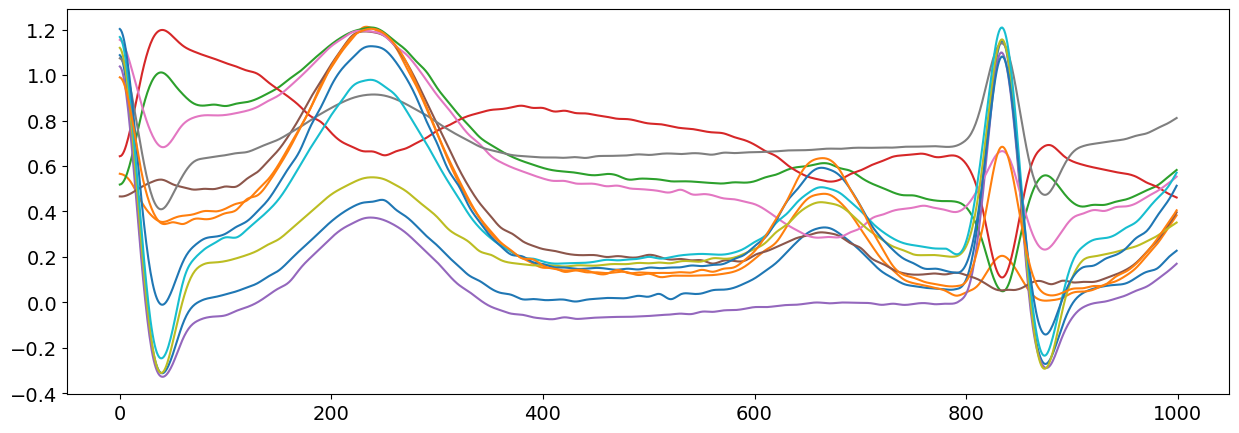

In [4]:
plt.plot(ecg12[0:1000])

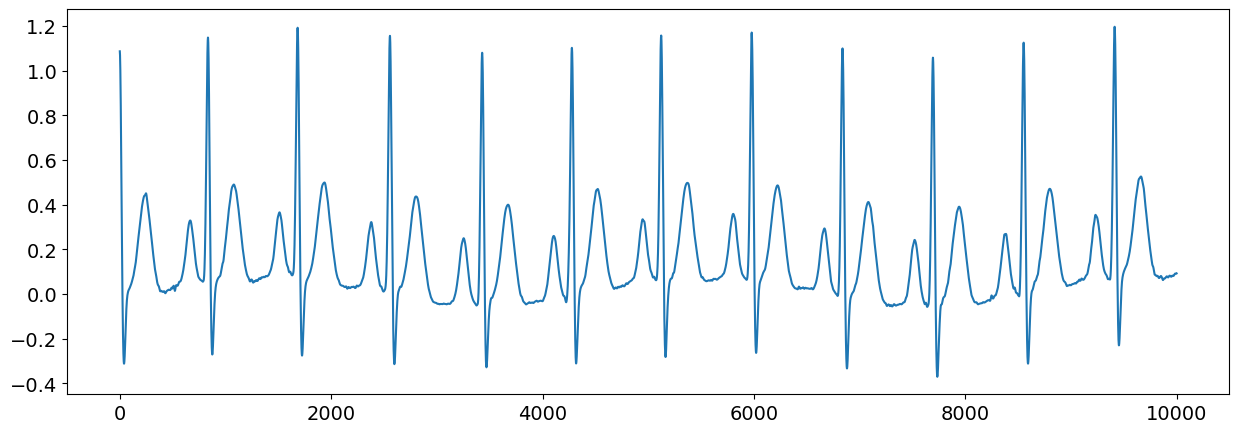

In [7]:
plt.plot(ecg12["I"][0:10000])

In [12]:
def sampen_loop(ser: List[float], batch_size = 100) -> List[float]:
    return [nk.entropy_sample(np.array(ser[index-batch_size:index]))[0] for index in range(len(ser))[batch_size:]]

In [13]:
ecg_samppen_loop = sampen_loop(ecg12[0:1000])

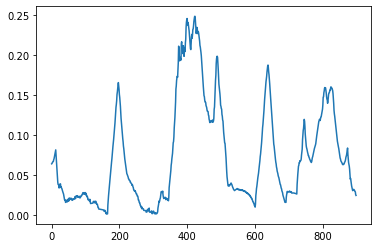

In [14]:
plt.plot(ecg_samppen_loop)

In [15]:
ecg_samppen_loop

[0.06392256793053926,
 0.06435521988144435,
 0.06551939419316317,
 0.06612417738247342,
 0.06672272295241245,
 0.06684841214091759,
 0.06912358189822185,
 0.07023758978451096,
 0.07241257756847717,
 0.07439450510697179,
 0.07628330474963083,
 0.07924937165414049,
 0.08141108233869813,
 0.07479162898463394,
 0.06899287148695131,
 0.06056019090246017,
 0.054479701756958626,
 0.049007579106694496,
 0.040961357631065405,
 0.03808885111959799,
 0.03778489622797994,
 0.03701915243549937,
 0.033616610798984974,
 0.037286339687947326,
 0.03832804472030457,
 0.03809984623227029,
 0.038759989809494716,
 0.034605529177475725,
 0.03525094947079954,
 0.03352269203864345,
 0.03304265362635299,
 0.03143890363712884,
 0.02998083221193567,
 0.028618805305652792,
 0.027370129559703294,
 0.02619322087693119,
 0.023996978311350177,
 0.021955926401415964,
 0.019048194970694474,
 0.01817260057964543,
 0.018569621526547685,
 0.01555586923863784,
 0.01578386770126189,
 0.017192400540372875,
 0.017783515488672

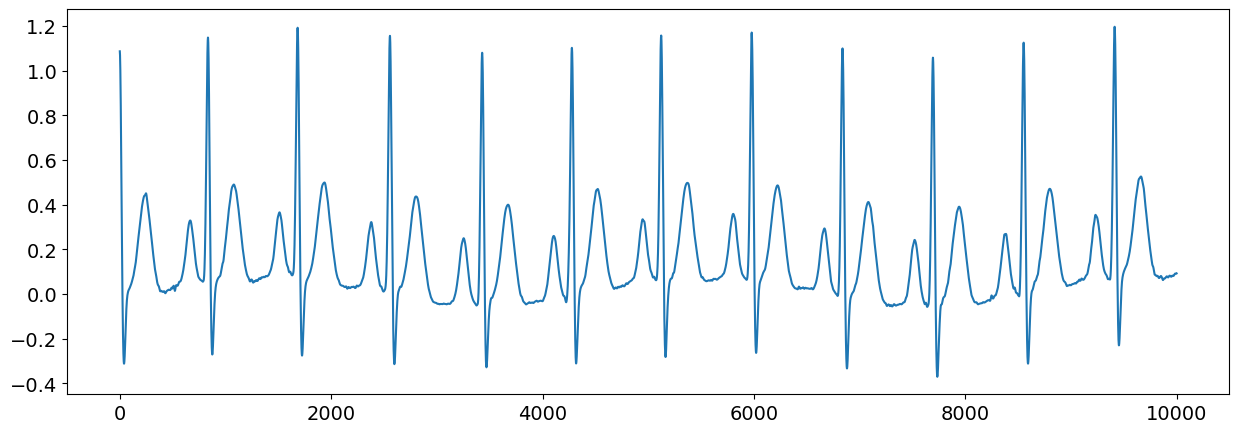

In [8]:
plt.plot(ecg12["I"][0:10000])

In [18]:
def fuzzy_loop(ser: List[float], member_fn=None,  batch_size = 100,) -> List[float]:
    return [nk.entropy_fuzzy(np.array(ser[index-batch_size:index]), member_fn=member_fn)[0] for index in range(len(ser))[batch_size:]]

In [10]:
ecg12_1 = ecg12["I"][0:10000]

In [11]:
ecg12_1_fuzzy = fuzzy_loop(ecg12_1)

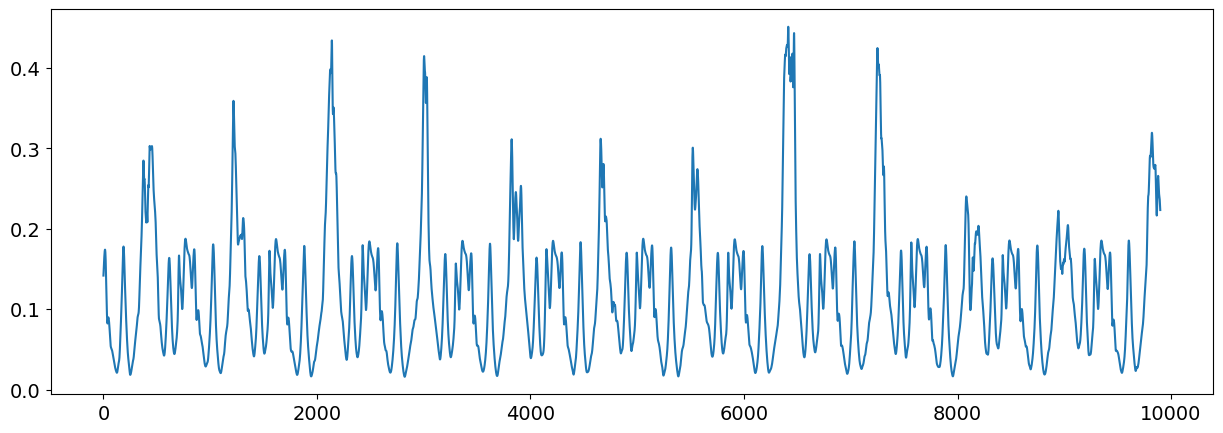

In [12]:
plt.plot(ecg12_1_fuzzy)

In [21]:
ecg12_1_fuzzy_exo = fuzzy_loop(ecg12_1, member_fn="bell_shaped")

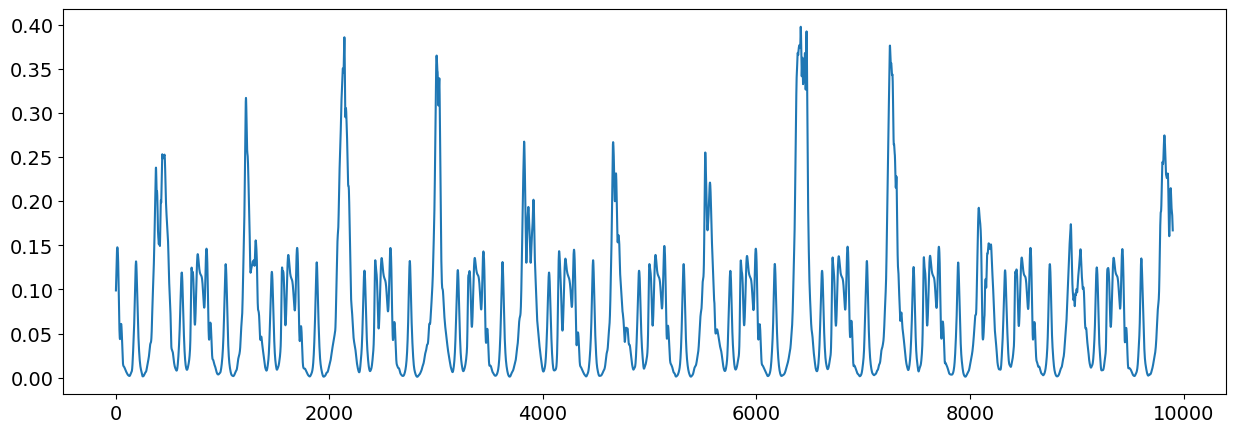

In [19]:
plt.plot(ecg12_1_fuzzy_exo)